### Marketing Revenue Attribution


#### Sources:
* https://medium.com/@mortenhegewald/marketing-channel-attribution-using-markov-chains-101-in-python-78fb181ebf1e
* https://towardsdatascience.com/marketing-channel-attribution-with-markov-chains-in-python-part-2-the-complete-walkthrough-733c65b23323
* Python implementation of the R Package ChannelAttribution: https://github.com/jmwoloso/pychattr



In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess
# This is a python implementation of the ChannelAttribution package in R and it works perfectly 
from pychattr.channel_attribution import MarkovModel
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [5]:
# Load in our data
df = pd.read_csv("./other_data/Channel_attribution.csv")

# Grab list of columns to iterate through
cols = df.columns

# Iterate through columns to change all ints to str and remove any trailing '.0'
for col in cols:
    df[col] = df[col].astype(str)
    df[col] = df[col].map(lambda x: str(x)[:-2] if "." in x else str(x))

In [6]:
df.head()

,R05A.01,R05A.02,R05A.03,R05A.04,R05A.05,R05A.06,R05A.07,R05A.08,R05A.09,R05A.10,...,R05A.12,R05A.13,R05A.14,R05A.15,R05A.16,R05A.17,R05A.18,R05A.19,R05A.20,Output
0,16,4,3,5,10,8,6,8,13,20,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2,1,9,10,1,4,3,21,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,9,13,20,16,15,21,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,8,15,20,21,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,16,9,13,20,21,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [7]:
# Create a total path to conversion variable
df['Path'] = ''
for i in df.index:
    #df.at[i, 'Path'] = 'Start'
    for x in cols:
        df.at[i, 'Path'] = df.at[i, 'Path'] + df.at[i, x] + ' > '

In [8]:
df.head()

,R05A.01,R05A.02,R05A.03,R05A.04,R05A.05,R05A.06,R05A.07,R05A.08,R05A.09,R05A.10,...,R05A.13,R05A.14,R05A.15,R05A.16,R05A.17,R05A.18,R05A.19,R05A.20,Output,Path
0,16,4,3,5,10,8,6,8,13,20,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,16 > 4 > 3 > 5 > 10 > 8 > 6 > 8 > 13 > 20 > 21...
1,2,1,9,10,1,4,3,21,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,2 > 1 > 9 > 10 > 1 > 4 > 3 > 21 > nan > nan > ...
2,9,13,20,16,15,21,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,9 > 13 > 20 > 16 > 15 > 21 > nan > nan > nan >...
3,8,15,20,21,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,8 > 15 > 20 > 21 > nan > nan > nan > nan > nan...
4,16,9,13,20,21,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,16 > 9 > 13 > 20 > 21 > nan > nan > nan > nan ...


In [9]:
# Split path on conversion (channel 21)
df["Path"] = df["Path"].map(lambda x: x.split(" > 21")[0])

# Create conversion value we can sum to get total conversions for each path
df["Conversion"] = 1

In [10]:
# Select relevant columns
df = df[["Path", "Conversion"]]

# Sum conversions by Path
df = df.groupby("Path").sum().reset_index()

# Write DF to CSV to be executed in R
df.to_csv("./other_data/Paths.csv", index=False)

In [22]:
path_feature="Path"
conversion_feature="Conversion"
null_feature=None
revenue_feature="revenue" # not used here
cost_feature="cost" # not used here
separator=">"
k_order=1
n_simulations=100000
max_steps=None
return_transition_probs=True
random_state=26

# instantiate the model
mm = MarkovModel(path_feature=path_feature,
                 conversion_feature=conversion_feature,
                 null_feature=null_feature,
                 separator=separator,
                 k_order=k_order,
                 n_simulations=n_simulations,
                 max_steps=max_steps,
                 return_transition_probs=return_transition_probs,
                 random_state=random_state)

In [23]:
# Fit the Markov model
mm.fit(df)

In [27]:
# Save the simulation results
markov = mm.attribution_model_

In [29]:
mm.attribution_model_

,channel_name,total_conversions
0,1,81.813231
1,20,432.401018
2,12,83.025279
3,14,62.926466
4,13,194.751381
5,3,124.352581
6,17,83.395954
7,6,63.826676
8,8,61.584976
9,10,211.378794


In [25]:
# view the removal effects
print(mm.removal_effects_)

   channel_name  removal_effect
0             1         0.13905
1            20         0.73491
2            12         0.14111
3            14         0.10695
4            13         0.33100
5             3         0.21135
6            17         0.14174
7             6         0.10848
8             8         0.10467
9            10         0.35926
10           11         0.20113
11           16         0.26930
12            2         0.16724
13            4         0.37887
14            7         0.07192
15            5         0.14050
16            9         0.30350
17           15         0.11890
18           18         0.00959
19           19         0.02598


In [30]:
# Select only the necessary columns and rename them

markov.columns = ["Channel", "Conversion"]

In [31]:
# First Touch Attribution
df['First Touch'] = df['Path'].map(lambda x: x.split(' > ')[0])
df_ft = pd.DataFrame()
df_ft['Channel'] = df['First Touch']
df_ft['Attribution'] = 'First Touch'
df_ft['Conversion'] = 1
df_ft = df_ft.groupby(['Channel', 'Attribution']).sum().reset_index()

# Last Touch Attribution
df['Last Touch'] = df['Path'].map(lambda x: x.split(' > ')[-1])
df_lt = pd.DataFrame()
df_lt['Channel'] = df['Last Touch']
df_lt['Attribution'] = 'Last Touch'
df_lt['Conversion'] = 1
df_lt = df_lt.groupby(['Channel', 'Attribution']).sum().reset_index()

# Linear Attribution
channel = []
conversion = []
for i in df.index:
    for j in df.at[i, 'Path'].split(' > '):
        channel.append(j)
        conversion.append(1/len(df.at[i, 'Path'].split(' > ')))
lin_att_df = pd.DataFrame()
lin_att_df['Channel'] = channel
lin_att_df['Attribution'] = 'Linear'
lin_att_df['Conversion'] = conversion
lin_att_df = lin_att_df.groupby(['Channel', 'Attribution']).sum().reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


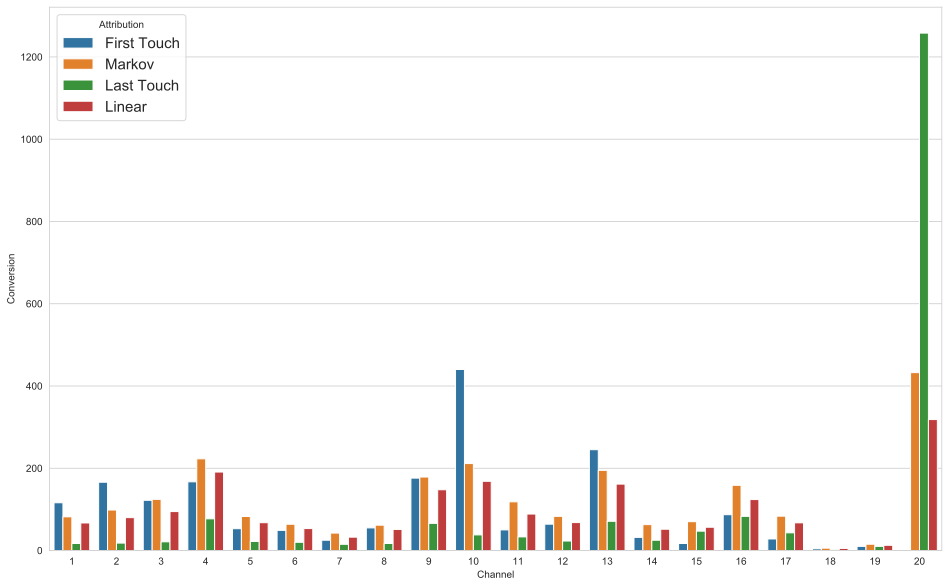

In [32]:
# Concatenate the four data frames to a single data frame
df_total_attr = pd.concat([df_ft, df_lt, lin_att_df, markov])
df_total_attr['Channel'] = df_total_attr['Channel'].astype(int)
df_total_attr.sort_values(by='Channel', ascending=True, inplace=True)
# Put the Markov References back in from faulty code earlier
import numpy as np
df_total_attr = df_total_attr.replace(np.nan, 'Markov', regex=True)

# Visualize the attributions
sns.set_style("whitegrid")
plt.rc('legend', fontsize=15)
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x='Channel', y='Conversion', hue='Attribution', data=df_total_attr)
plt.show()

In [33]:
df_total_attr

,Attribution,Channel,Conversion
0,First Touch,1,116.000000
0,Markov,1,81.813231
0,Last Touch,1,17.000000
0,Linear,1,66.873661
11,Linear,2,79.945001
...,...,...,...
10,First Touch,19,10.000000
19,Markov,19,15.285924
1,Markov,20,432.401018
12,Last Touch,20,1258.000000


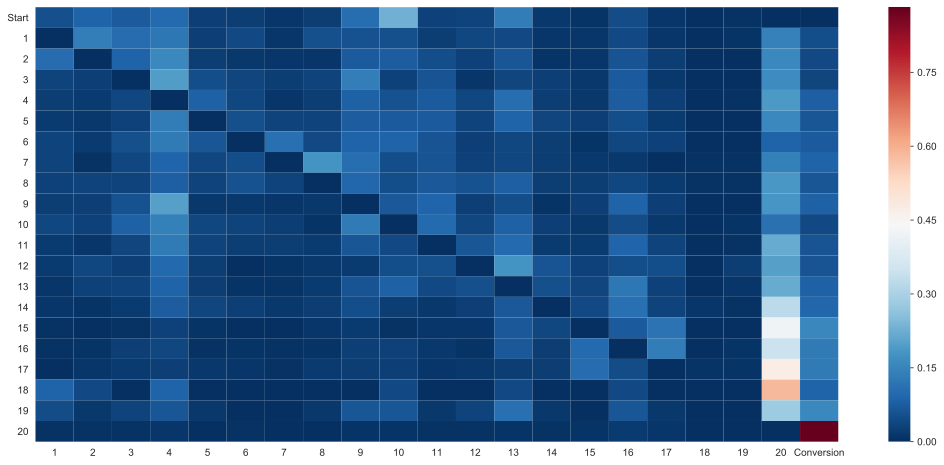

In [34]:
# Read in transition matrix CSV
trans_prob = pd.read_csv("./other_data/Markov - Output - Transition matrix.csv")

# Convert data to floats
trans_prob["transition_probability"] = trans_prob["transition_probability"].astype(
    float
)

# Convert start and conversion event to numeric values so we can sort and iterate through
trans_prob.replace("(start)", "0", inplace=True)
trans_prob.replace("(conversion)", "21", inplace=True)

# Get unique origin channels
channel_from_unique = trans_prob["channel_from"].unique().tolist()
channel_from_unique.sort(key=float)

# Get unique destination channels
channel_to_unique = trans_prob["channel_to"].unique().tolist()
channel_to_unique.sort(key=float)

# Create new matrix with origin and destination channels as columns and index
trans_matrix = pd.DataFrame(columns=channel_to_unique, index=channel_from_unique)

# Assign the probabilities to the corresponding cells in our transition matrix
for f in channel_from_unique:
    for t in channel_to_unique:
        x = trans_prob[
            (trans_prob["channel_from"] == f) & (trans_prob["channel_to"] == t)
        ]
        prob = x["transition_probability"].values
        if prob.size > 0:
            trans_matrix[t][f] = prob[0]
        else:
            trans_matrix[t][f] = 0

# Convert all probabilities to floats
trans_matrix = trans_matrix.apply(pd.to_numeric)

# Rename our start and conversion events
trans_matrix.rename(index={"0": "Start"}, inplace=True)
trans_matrix.rename(columns={"21": "Conversion"}, inplace=True)

# Visualize this transition matrix in a heatmap
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(trans_matrix, cmap="RdBu_r")
plt.show()

In [11]:
df

,Path,Conversion
0,1 > 1 > 1 > 20,1
1,1 > 1 > 12 > 12,1
2,1 > 1 > 14 > 13 > 12 > 20,1
3,1 > 1 > 3 > 13 > 3 > 20,1
4,1 > 1 > 3 > 17 > 17,1
...,...,...
1901,9 > 9 > 4 > 3 > 9 > 20,1
1902,9 > 9 > 4 > 6 > 4,1
1903,9 > 9 > 5 > 13 > 16,1
1904,9 > 9 > 6,1
